<a href="https://colab.research.google.com/github/kashifalikhan36/Machine_learning_Resources/blob/main/Handwritten_Digit_Classifier_CNN_Model_Explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
  import matplotlib.pyplot as plt
  from keras.datasets import mnist
  from keras.models import Sequential
  from keras.layers import Dense, Dropout, Flatten
  from keras.layers import Conv2D, MaxPooling2D
  from keras.utils import to_categorical
  from keras.layers import BatchNormalization
  from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
print("X_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", x_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


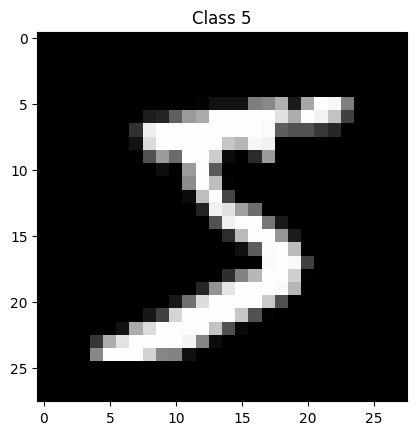

In [9]:
plt.imshow(x_train[0],cmap="gray")
plt.title("Class "+str(y_train[0]))
plt.show()

In [20]:
#Tensorflow can handle format: (batch,height,width,channel)
feature_train=x_train.reshape(x_train.shape[0],28,28,1)
feature_test=x_test.reshape(x_test.shape[0],28,28,1)

feature_train=feature_train.astype("float32")
feature_test=feature_test.astype("float32")

# Min max normalization range in between [0,1]
feature_train/=255
feature_test/=255

#Encoding as that we do in One_Hot_encoding
#example:- 2->[0,0,1,0,0,0,0,0,0,0]
target_train=to_categorical(y_train,10)
target_test=to_categorical(y_test,10)

In [38]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)))
#BatchNormalization maintains the mean activation close to 0 and std close to 1
#reduse the running-time of training significantly
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
#Dropout helps to not use 30% Neuron, so that we can get the data not biased on the training dataset
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,594 (1.28 MB)

 Trainable params: 332,778 (1.27 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [39]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [31]:
model.fit(feature_train,target_train,batch_size=32,epochs=2,verbose=2,validation_data=(feature_test,target_test))

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 184s 95ms/step - accuracy: 0.9370 - loss: 0.2070 - val_accuracy: 0.9868 - val_loss: 0.0406
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 95ms/step - accuracy: 0.9840 - loss: 0.0518 - val_accuracy: 0.9873 - val_loss: 0.0383


In [32]:
model.evaluate(feature_test,target_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.9847 - loss: 0.0457


[0.03834576904773712, 0.9872999787330627]

In [40]:
train_generator=ImageDataGenerator(
    rotation_range=8,
    zoom_range=0.1,
    shear_range=0.3,
    width_shift_range=0.08,
    height_shift_range=0.08
)
test_generator=ImageDataGenerator()
train_generator=train_generator.flow(feature_train,target_train,batch_size=64)
test_generator=test_generator.flow(feature_test,target_test,batch_size=64)

In [42]:
model.fit(
    train_generator,
    steps_per_epoch=60000 // 64,
    epochs=5,
    validation_data=test_generator,
    validation_steps=10000 // 64
)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 198s 206ms/step - accuracy: 0.9040 - loss: 0.3164 - val_accuracy: 0.9833 - val_loss: 0.0548
Epoch 2/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 64us/step - accuracy: 0.9688 - loss: 0.0724 - val_accuracy: 1.0000 - val_loss: 0.0135
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


937/937 ━━━━━━━━━━━━━━━━━━━━ 197s 200ms/step - accuracy: 0.9788 - loss: 0.0693 - val_accuracy: 0.9888 - val_loss: 0.0349
Epoch 4/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.9844 - loss: 0.0440 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 5/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 187s 199ms/step - accuracy: 0.9839 - loss: 0.0519 - val_accuracy: 0.9883 - val_loss: 0.0331


In [43]:
model.evaluate(feature_test,target_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9860 - loss: 0.0400


[0.03307390585541725, 0.9883000254631042]